<a href="https://colab.research.google.com/github/MiLAchain/IMA-Restaurant-Expansion/blob/main/The_Copy_of_%E2%80%9CBDAO_IMA_Cloud_Project_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Authentication**

Everytime before you make connection to Google Cloud via API, you need to run the below code to grant access to Google Cloud services.

In [1]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

Until here, you have successfully loaded all data into your data warehouse (BigQuery) in Google Cloud.

# **Query data from BigQuery and do analysis**

Now that the data is stored in BigQuery, you can make connection to BigQuery and extract data you want.

### Query all data from restaurant data file

In [3]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

### Query required data from restaurant data file

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, name, city, state, latitude,	longitude, stars, review_count, is_open
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open
0,bw90rjFL02A_8rVE34m5Lg,Cosmetic Solutions,Lula Lula,HI,38.816486,-90.321750,3.5,17,1
1,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0
2,gCF0QQWzI9lDouhLfTbYCA,MudMan Food Truck,Kalispell,MT,27.789678,-82.680746,5.0,6,0
3,1H9WYGFJ4AFwXq7WCOOMtg,Two Elk Restaurant,Vail,CO,32.094854,-110.773491,3.5,12,0
4,IvQs2hhXKZ4NgZhVZ5jjjQ,Pumpernickles Catering,Liverpool,XMS,38.673049,-90.423156,4.0,5,1


# **Data processing and data analysis**

### Chck the dataset (shape,dtype,NaN and Duplicate)

In [ ]:
restaurant_df.shape

(52286, 10)

In [ ]:
restaurant_df.dtypes

business_id      object
name             object
city             object
state            object
latitude        float64
longitude       float64
stars           float64
review_count      Int64
is_open           Int64
not_open          Int64
dtype: object

In [ ]:
restaurant_df.isnull().sum()

business_id     0
name            0
city            0
state           0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
not_open        0
dtype: int64

In [ ]:
# The number of unique and duplicated rows:
print("\nCheck the duplicated rows:")
print(restaurant_df.duplicated().value_counts())


Check the duplicated rows:
False    52286
True     52286
Name: count, dtype: int64


In [ ]:
restaurant_df = restaurant_df.drop_duplicates()
print(restaurant_df.duplicated().value_counts())

False    52286
Name: count, dtype: int64


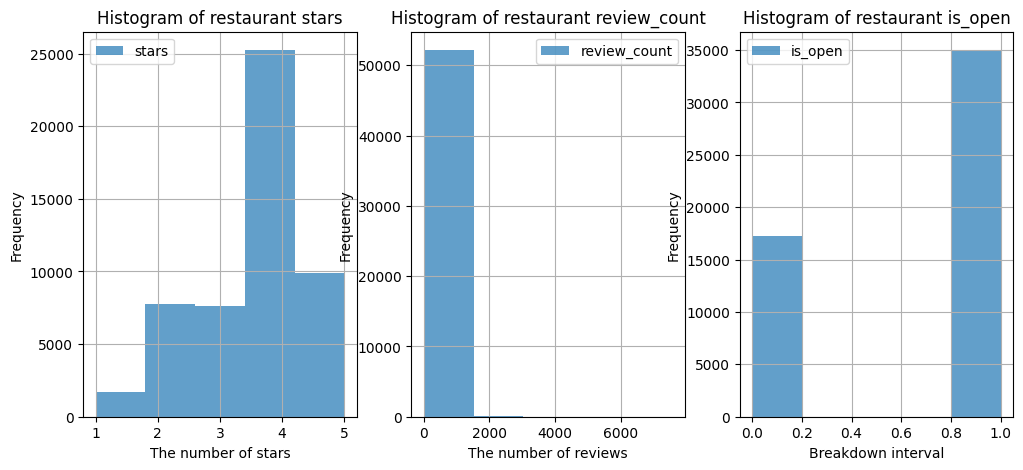

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))

# Visualization

# Histogram for stars
plt.subplot(1, 3, 1)
plt.hist(restaurant_df['stars'], bins= 5, alpha=0.7, label = ["stars"])
plt.title('Histogram of restaurant stars')
plt.xlabel('The number of stars')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Histogram for review_count
plt.subplot(1, 3, 2)
plt.hist(restaurant_df['review_count'], bins= 5, alpha=0.7, label = ["review_count"])
plt.title('Histogram of restaurant review_count')
plt.xlabel('The number of reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Histogram for is_open
plt.subplot(1, 3, 3)
plt.hist(restaurant_df['is_open'], bins= 5, alpha=0.7, label = ["is_open"])
plt.title('Histogram of restaurant is_open')
plt.xlabel('Breakdown interval')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

In [ ]:
import pandas as pd
import numpy as np

dict_restaurant = restaurant_df.iloc[:, -3:]

# Show the interval and counts of each bin
print("Interval division and counts in each bin")
counts, bin_edges = np.histogram(dict_restaurant.iloc[:, 0], 5)
print(bin_edges)
print(counts)
# 3.4-4.2的是最多的25242

print("Interval division and counts in each bin")
counts, bin_edges = np.histogram(dict_restaurant.iloc[:, 1], 3)
print(bin_edges)
print(counts)
# 评论数5.0-2526.0有52245


Interval division and counts in each bin
[1.  1.8 2.6 3.4 4.2 5. ]
[ 1728  7761  7641 25242  9914]
Interval division and counts in each bin
[5.0 2526.0 5047.0 7568.0]
[52245    34     7]
Interval division and counts in each bin
[0.0 0.5 1.0]
[17282 35004]


<Axes: ylabel='review_count'>

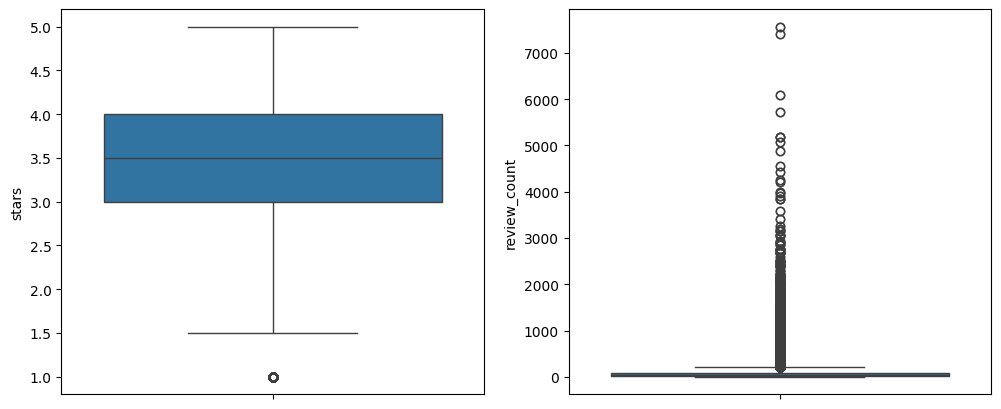

In [ ]:
plt.figure(figsize=(12, 5))

# Visualization

# Boxplot for stars
plt.subplot(1, 2, 1)
sns.boxplot(data=restaurant_df['stars'])

# Boxplot for review_count
plt.subplot(1, 2, 2)
sns.boxplot(data=restaurant_df['review_count'])


In [ ]:
# Generate a new column "not_open" in df


# replace 0 and 1 in "is open" and store in new col
restaurant_df['not_open'] = restaurant_df['is_open'].replace({0: 1, 1: 0})

restaurant_df

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open
0,bw90rjFL02A_8rVE34m5Lg,Cosmetic Solutions,Lula Lula,HI,38.816486,-90.321750,3.5,17,1,0
1,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0,1
2,gCF0QQWzI9lDouhLfTbYCA,MudMan Food Truck,Kalispell,MT,27.789678,-82.680746,5.0,6,0,1
3,1H9WYGFJ4AFwXq7WCOOMtg,Two Elk Restaurant,Vail,CO,32.094854,-110.773491,3.5,12,0,1
4,IvQs2hhXKZ4NgZhVZ5jjjQ,Pumpernickles Catering,Liverpool,XMS,38.673049,-90.423156,4.0,5,1,0
...,...,...,...,...,...,...,...,...,...,...
100214,CLqNKOlBfo5844mng7CZfw,Molinari's,Franklin,TN,35.954431,-86.802116,3.5,132,0,1
100215,EG_wLI1KjAk_FpIRTj4T8Q,Kawai Poke Co.,Nashville,TN,36.175315,-86.756486,4.5,66,1,0
100216,SX3amTn_wdaYabPpFrqVNQ,Franklin Soul,Franklin,TN,35.956799,-86.802399,4.5,105,0,1
100217,nwCr13LeZQ4LuQH7ZrQlmg,Delicias De El Salvador,Nashville,TN,36.127868,-86.710876,4.0,8,1,0


In [ ]:
# First, ensure pandas-gbq is installed
# !pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'you_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_dataset.restaurant_data_location_analysis'
project_id = 'whyso-project-0621'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
restaurant_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 1252.40it/s]


In [5]:
# Query data based on condition from the table
query = f"""
    SELECT business_id, name, city, state, latitude,	longitude, stars, review_count, is_open
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE state = 'CA'
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open
0,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,Santa Barbara,CA,34.423302,-119.705471,4.5,116,1
1,JWFpjvCc_nkNDVtMPx1ZGg,Bogo SB,Santa Barbara,CA,34.423043,-119.703286,4.5,12,1
2,9L-MR0arflwFMF9szEBOOg,California Wine Festival,Santa Barbara,CA,34.414466,-119.685190,4.5,7,1
3,aYMpjij5ShtEoZueMrQPRw,The Mill,Santa Barbara,CA,34.421119,-119.690633,4.0,5,1
4,nTZuJSfwCoNOyA1yS3rbOQ,The Silver Bough,Santa Barbara,CA,34.421245,-119.640407,4.5,7,0


In [6]:
restaurant_df.shape

(2322, 9)

In [9]:
unique_cities = restaurant_df['city'].unique()
print(unique_cities)

['Santa Barbara' 'Carpinteria' 'Isla Vista' 'Goleta' 'Montecito'
 'Summerland' 'Santa  Barbara' 'Truckee']


### Query data from restaurant checkin data file (examples)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_checkin" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,4B5ORibJ3vhimhW8LTY6Fg,2013-06-01 11:49:12+00:00,256,True,2013,6,1,11
1,ELi2PNGWVVIdBJSJbhQCtQ,2016-04-01 19:54:51+00:00,256,True,2016,4,1,19
2,GMezqeTkp3_nOfcDiEKQeg,2013-01-01 22:08:37+00:00,256,True,2013,1,1,22
3,aRb_ToTRcHa9BICLLj8n-A,2020-01-01 23:17:55+00:00,256,True,2020,1,1,23
4,7D5-a53BLau19RpMu-L3zg,2017-01-01 03:21:20+00:00,1024,True,2017,1,1,3


In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, total_number_of_checkin, year, month, day, hour
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,total_number_of_checkin,year,month,day,hour
0,tSFXJ0GFl5iUdy021YgWLw,5,2022,1,15,17
1,r9K46WZQ_hCi8vyyHV_tFw,517,2022,1,8,21
2,w1TAEpVjFkEGxL0X3CIG5A,8,2022,1,1,15
3,WBI4wpop4Ox0y5lg4GvhnQ,17,2022,1,9,23
4,UNIkpdktP0t3lIwakAjlnQ,21,2022,1,5,21


In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE year >=2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,date,total_number_of_checkin,restaurant,year,month,day,hour
0,B6Cn6maWQ6sLhLwYGLhSlg,2020-01-06 17:12:37+00:00,256,True,2020,1,6,17
1,FZuzdnT1k5Dx_VcVXpK5fw,2020-01-05 21:12:54+00:00,256,True,2020,1,5,21
2,FZuzdnT1k5Dx_VcVXpK5fw,2020-01-08 18:13:24+00:00,256,True,2020,1,8,18
3,K4wVovK22PnUpCNgy30KSA,2020-01-16 23:31:09+00:00,256,True,2020,1,16,23
4,c8R7kt6bpkc--N7l7V3OfA,2022-01-02 23:33:14+00:00,256,True,2022,1,2,23


### Query data from restaurant tips data file (examples)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,user_id,business_id,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10+00:00,0
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02+00:00,0
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05+00:00,0
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00,0
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34+00:00,0


In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT user_id, business_id, text,date
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,user_id,business_id,text,date
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10+00:00
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02+00:00
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05+00:00
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34+00:00


In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT user_id, business_id, text, date
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE EXTRACT(YEAR from date)>2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,user_id,business_id,text,date
0,UbWdZLRtZ5Xc4vUjXuKOhA,QoezRbYQncpRqyrLH6Iqjg,One of the best Cubans in Tampa!!,2021-06-18 18:38:58+00:00
1,HFmMg6R2zmUIYEugy32xlw,QoezRbYQncpRqyrLH6Iqjg,Delivery and ordering online was a breeze! Des...,2021-02-17 18:22:13+00:00
2,WLgY9EU9ZO4MyGz4pgJD1w,QoezRbYQncpRqyrLH6Iqjg,OMGOSH!!! Sandwiches are AMAZING. Worth the dr...,2021-04-24 10:22:48+00:00
3,MLoEHr3qv9bLTPo4Ig9ypw,xODBZmX4EmlVvbqtKN7YKg,Pretty good place. Nothing too wowing. But goo...,2021-06-03 00:52:49+00:00
4,g2soGKFqU6IenaEnf0HFpw,xODBZmX4EmlVvbqtKN7YKg,Their menu is much more limited than it used t...,2021-12-12 17:26:02+00:00


### Joining tables through SQL query (example)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_1 = "restaurant_data"
table_2 = "restaurant_checkin"
table_3 = "restaurant_tips"

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Adding restaurant information to checkin data by joining 'restaurant_checkin' and 'restaurant_data'
query = f"""
    SELECT r.business_id, r.name, r.address, r.city, r.state, r.stars, r.review_count, r.is_open, r.categories,c.business_id, c.total_number_of_checkin, c.year, c.month, c.day, c.hour
    FROM `{project_id}.{dataset_name}.{table_2}` AS c
    JOIN `{project_id}.{dataset_name}.{table_1}` AS r on r.business_id = c.business_id
    WHERE c.year >=2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

join_df = query_job.to_dataframe()
join_df.head()

,business_id,name,address,city,state,stars,review_count,is_open,categories,business_id_1,total_number_of_checkin,year,month,day,hour
0,I8n5N-GsqvyGG62ug1TrRQ,Bella Milano,455 Regency Park,O'Fallon,IL,3.5,160,1,"Salad, Gluten-Free, Bars, Pizza, Seafood, Ital...",I8n5N-GsqvyGG62ug1TrRQ,256,2021,6,6,23
1,K4wVovK22PnUpCNgy30KSA,Old Bakery Beer,400 Landmarks Blvd,Alton,IL,4.0,147,1,"Bars, American (New), Breakfast & Brunch, Brew...",K4wVovK22PnUpCNgy30KSA,256,2020,9,24,23
2,K4wVovK22PnUpCNgy30KSA,Old Bakery Beer,400 Landmarks Blvd,Alton,IL,4.0,147,1,"Bars, American (New), Breakfast & Brunch, Brew...",K4wVovK22PnUpCNgy30KSA,256,2020,2,29,18
3,K4wVovK22PnUpCNgy30KSA,Old Bakery Beer,400 Landmarks Blvd,Alton,IL,4.0,147,1,"Bars, American (New), Breakfast & Brunch, Brew...",K4wVovK22PnUpCNgy30KSA,256,2020,1,18,19
4,aRb_ToTRcHa9BICLLj8n-A,Pho Viet Hoa,3646 Welsh Rd,Willow Grove,PA,4.5,174,1,"Restaurants, Vietnamese",aRb_ToTRcHa9BICLLj8n-A,256,2021,2,14,20


When joining, be careful of one-to-many. In restaurant data there are information for each restaurant, but in checkin and tips data there are multiple records for one single restaurants. Thus, it is better to use checkin or tips data to join restaurant data. If you do the opposite, you might have error and query incomplete data.

If you are just not familiar with SQL, you can just query dataset one by one and then use Python to merge or join them if you need.

Since the query data is converted into dataframe, you can easily use Python to do analysis or modelling. This is up to you how you would do.

# **Store the transformed data back to BigQuery for visualisation**

We know data visualisation requires clean data and if we read data directly in Tableau it might crash because the data size is large and the data might messy.

You could consider using Python to clean and process your data and then you can store the transformed data table back to BigQuery and then you can make connections to the transformed table in Tableau to do visualisation.

In [ ]:
# First, ensure pandas-gbq is installed
# !pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'you_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_dataset.transformed_restaurant_df'
project_id = 'whyso-project-0621'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
restaurant_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 4728.64it/s]


By running the above code, you should be able to see there is a new table uploaded to BigQuery under your dataset.

Next, you can consider using Tableau for some visual analysis:)

Let me know if you have further questions.